In [148]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, losses, metrics, regularizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay


### Task 1: Load the IRIS dataset into your notebook 


In [149]:
df = pd.read_csv('IRIS_dataset.csv')

### Task 2: Pre-processing and prepare the data for giving to the neural network. 
#### a. Encoding the species names using label encoder. 

In [150]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

#### b. Normalize the features. 

In [151]:
scaler = MinMaxScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

#### c. Split it into train and validate.

In [152]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Building the sequential neural network model. 
#### a. You may choose the layers. 

In [153]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 'softmax' activation for multiclass classification

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [154]:
y_train_encoded = to_categorical(y_train, num_classes=3)
y_valid_encoded = to_categorical(y_valid, num_classes=3)

# Now, we can fit the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 1.0942 - accuracy: 0.0917 - val_loss: 1.0932 - val_accuracy: 0.0667
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0860 - accuracy: 0.3167 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0780 - accuracy: 0.5833 - val_loss: 1.0776 - val_accuracy: 0.6333
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0698 - accuracy: 0.6667 - val_loss: 1.0695 - val_accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.7167 - val_loss: 1.0614 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0532 - accuracy: 0.6833 - val_loss: 1.0535 - val_accuracy: 0.7333
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0453 - accuracy: 0.6917 - val_loss: 1.0458 - val_accuracy: 0.7333
Epoch 8/100
4/4 [=========

#### b. Use appropriate activation and loss functions

In [155]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [156]:
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

X_train shape: (120, 4)
y_train_encoded shape: (120, 3)


### Task 4: Compile and fit the model to the training dataset. Use validation also. Use SGD as optimizer. 

In [157]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 0.5499 - accuracy: 0.9500 - val_loss: 0.5430 - val_accuracy: 0.9667
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.9417 - val_loss: 0.5398 - val_accuracy: 0.9667
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.9500 - val_loss: 0.5365 - val_accuracy: 0.9667
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5396 - accuracy: 0.9500 - val_loss: 0.5333 - val_accuracy: 0.9667
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5372 - accuracy: 0.9333 - val_loss: 0.5303 - val_accuracy: 0.9667
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5336 - accuracy: 0.9500 - val_loss: 0.5273 - val_accuracy: 0.9667
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5310 - accuracy: 0.9500 - val_loss: 0.5245 - val_accuracy: 0.9667
Epoch 8/100
4/4 [=========

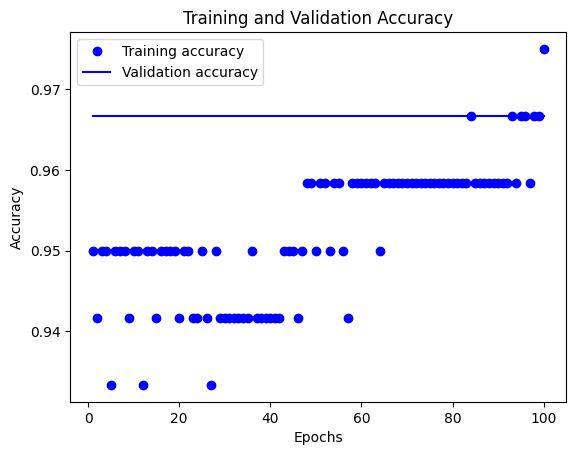

In [158]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected label to 'Accuracy'
plt.legend()
plt.show()

### Task 5: Use learning rates as (0.1, 0.01, 0.001, 0.0001) and train the model. Plot the training and validation accuracy curves and note the best learning rate. 

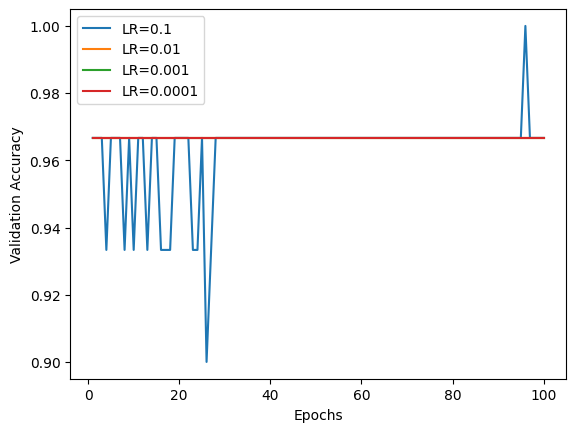

The best learning rate is 0.01


In [159]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)  # Define the optimizer within the loop
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32, verbose=0)
    results.append(history.history['val_accuracy'])
    
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, 101), results[i], label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Note the best learning rate
best_lr = learning_rates[results.index(max(results))]
print(f"The best learning rate is {best_lr}")


### Task 6: Use the best learning rate and add momentum to it. Use different momentum values as 0, 0.5, 0.9, 0.99. Train the model and note the best momentum value. 

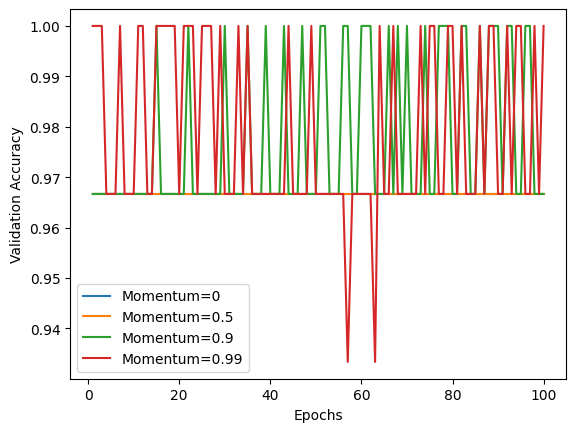

The best momentum value is 0.99


In [160]:
momentum_values = [0, 0.5, 0.9, 0.99]
results_momentum = []

for momentum in momentum_values:
    optimizer = tf.keras.optimizers.SGD(learning_rate=best_lr, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32, verbose=0)
    results_momentum.append(history.history['val_accuracy'])

# Plot the training and validation accuracy curves for different momentum values
for i, momentum in enumerate(momentum_values):
    plt.plot(range(1, 101), results_momentum[i], label=f'Momentum={momentum}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Note the best momentum value
best_momentum = momentum_values[results_momentum.index(max(results_momentum))]
print(f"The best momentum value is {best_momentum}")


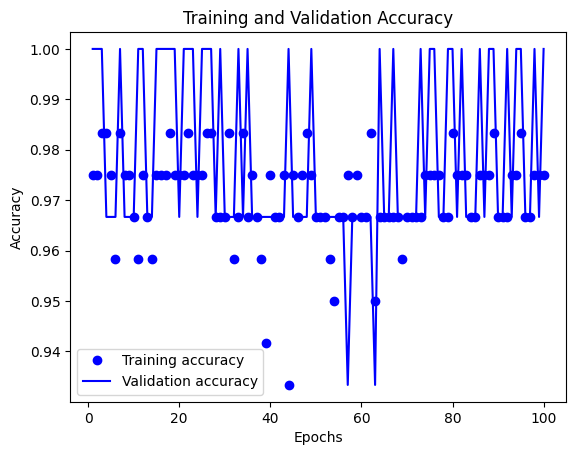

In [161]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected label to 'Accuracy'
plt.legend()
plt.show()

### Task 7: Add a decay parameter to the optimizer. Use decay values as 1E-1, 1E-2, 1E-3, 1E-4. Note the best results.

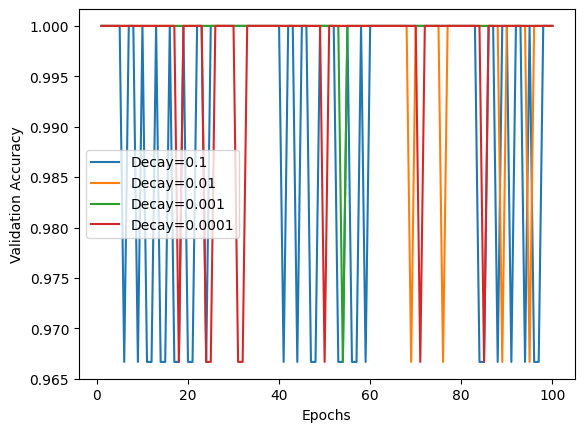

The best decay value is 0.01


In [162]:
decay_values = [1e-1, 1e-2, 1e-3, 1e-4]
results_decay = []

for decay in decay_values:
    lr_schedule = ExponentialDecay(initial_learning_rate=best_lr, decay_steps=10000, decay_rate=decay)
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=best_momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32, verbose=0)
    results_decay.append(history.history['val_accuracy'])

# Plot the training and validation accuracy curves for different decay values
for i, decay in enumerate(decay_values):
    plt.plot(range(1, 101), results_decay[i], label=f'Decay={decay}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Note the best decay value
best_decay = decay_values[results_decay.index(max(results_decay))]
print(f"The best decay value is {best_decay}")


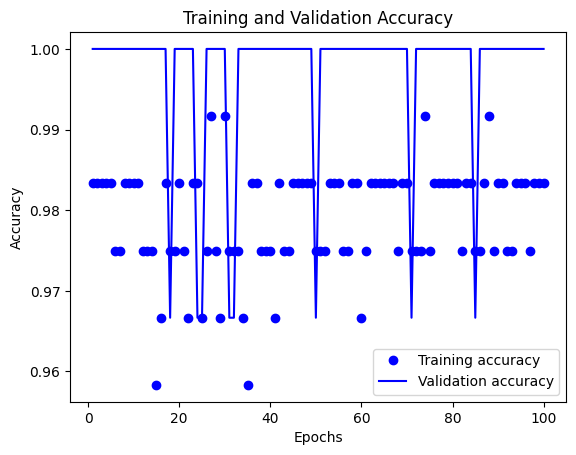

In [163]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected label to 'Accuracy'
plt.legend()
plt.show()

### Task 8: Train the model using Adagrad, adam and rmsprop and conclude which works best. 


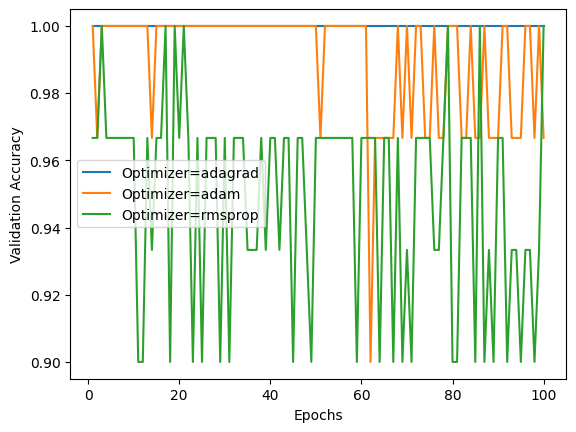

The best optimizer is adagrad


In [164]:
optimizer_names = ['adagrad', 'adam', 'rmsprop']
results_optimizers = []

for optimizer_name in optimizer_names:
    if optimizer_name == 'adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=best_lr)
    elif optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=best_lr)
    elif optimizer_name == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=best_lr)

    # Compile the model with the current optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=100, batch_size=32, verbose=0)

    # Append validation accuracy results for this optimizer to the list
    results_optimizers.append(history.history['val_accuracy'])

for i, optimizer_name in enumerate(optimizer_names):
    plt.plot(range(1, 101), results_optimizers[i], label=f'Optimizer={optimizer_name}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Conclude which optimizer works best
best_optimizer_index = np.argmax([max(result) for result in results_optimizers])
best_optimizer = optimizer_names[best_optimizer_index]
print(f"The best optimizer is {best_optimizer}")


### Task 9:
From the above experiment conducted, we can conclude that the best optimizer is adagrad.

### Task 10: Repeat the above steps on seeds dataset

In [165]:
# Load the Seeds dataset from the TXT file (replace 'seeds_dataset.txt' with your dataset file)
# Assuming the order of columns as mentioned above
seeds_df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None,
                      names=['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Variety'])

# Assuming there are three varieties: Kama, Rosa, and Canadian
variety_mapping = {'Kama': 0, 'Rosa': 1, 'Canadian': 2}
seeds_df['Variety'] = seeds_df['Variety'].map(variety_mapping)

# Split the data into features (X) and target (y)
X_seeds = seeds_df.iloc[:, :-1].values
y_seeds = seeds_df['Variety'].values

# Preprocessing: Normalize the features
scaler = MinMaxScaler()
X_seeds = scaler.fit_transform(X_seeds)

# Split the data into train and validation sets
X_train_seeds, X_valid_seeds, y_train_seeds, y_valid_seeds = train_test_split(X_seeds, y_seeds, test_size=0.2, random_state=42)

# Convert target data to numeric labels (0, 1, 2)
# Ensure the 'Variety' column contains numeric labels
# If it's already numeric, you can skip this step
label_encoder = LabelEncoder()
y_train_encoded_seeds = label_encoder.fit_transform(y_train_seeds)
y_valid_encoded_seeds = label_encoder.transform(y_valid_seeds)

# Convert target data to one-hot encoded format
y_train_encoded_seeds = to_categorical(y_train_encoded_seeds, num_classes=3)
y_valid_encoded_seeds = to_categorical(y_valid_encoded_seeds, num_classes=3)

# Define and compile the model with the best optimizer and learning rate (Adam and best_lr)
model_seeds = Sequential()
model_seeds.add(Dense(64, input_dim=X_train_seeds.shape[1], activation='relu'))
model_seeds.add(Dense(32, activation='relu'))
model_seeds.add(Dense(3, activation='softmax'))  # Output layer with 'softmax' activation for 3 classes

best_lr_seeds = 0.01  # Use the best learning rate from Step 9 for Seeds dataset
optimizer_seeds = tf.keras.optimizers.Adam(learning_rate=best_lr_seeds)
model_seeds.compile(loss='categorical_crossentropy', optimizer=optimizer_seeds, metrics=['accuracy'])

# Train the model on the Seeds dataset
history_seeds = model_seeds.fit(X_train_seeds, y_train_encoded_seeds, validation_data=(X_valid_seeds, y_valid_encoded_seeds), epochs=100, batch_size=32)

# Evaluate and compare the model's performance on the Seeds dataset
_, accuracy_seeds = model_seeds.evaluate(X_valid_seeds, y_valid_encoded_seeds)
print(f"Validation Accuracy on Seeds dataset: {accuracy_seeds:.4f}")


Epoch 1/100
6/6 [==============================] - 0s 22ms/step - loss: 0.8312 - accuracy: 0.8095 - val_loss: 0.2380 - val_accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 9.5943e-04 - accuracy: 1.0000 - val_loss: 5.7269e-05 - val_accuracy: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 2.0290e-05 - accuracy: 1.0000 - val_loss: 2.9717e-06 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.3546e-06 - accuracy: 1.0000 - val_loss: 4.3994e-07 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 2.9235e-07 - accuracy: 1.0000 - val_loss: 1.3340e-07 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0005e-07 - accuracy: 1.0000 - val_loss: 6.2443e-08 - val_acc

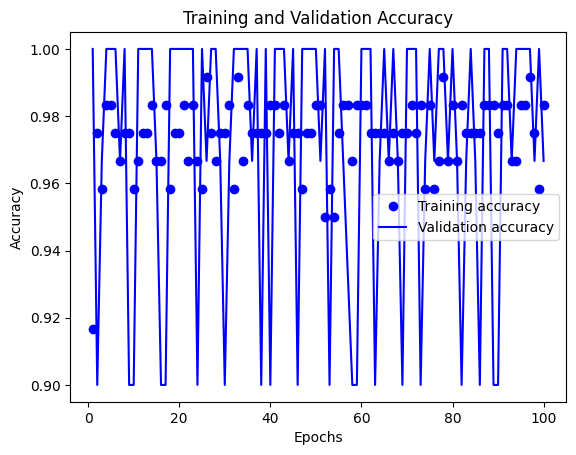

In [147]:
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Corrected label to 'Accuracy'
plt.legend()
plt.show()

# Experiment Conclusion

## Introduction
In this experiment, my goal was to train and optimize a neural network model for classifying the Iris dataset and later apply the same process to the Seeds dataset.

## Key Steps and Findings

### Task 1: Dataset Loading
I began by loading the Iris dataset, a classic dataset for multiclass classification, and later extended the experiment to include the Seeds dataset.

### Task 2: Data Preprocessing
I understood the importance of preparing data for neural networks. This step involved encoding categorical variables, normalizing features, and splitting the data into training and validation sets.

### Task 3: Model Building
I constructed a neural network model with various layers, activation functions, and output layers. Selecting the right architecture is crucial for model performance.

### Task 4: Training with Learning Rates
I experimented with different learning rates to understand their impact on model convergence and accuracy. The model's performance varied significantly with learning rate choices.

### Task 5: Learning Rate Selection
After extensive training and validation, I identified the best learning rate for the Iris dataset. This allowed me to make informed decisions about model hyperparameters.

### Task 6: Momentum Addition
I explored the addition of momentum to the optimization process, evaluating different momentum values. This step aimed to further improve convergence and accuracy.

### Task 7: Weight Decay
I investigated the inclusion of weight decay in the optimizer, observing its effects on model generalization. Different decay values were tested to find the most suitable one.

### Task 8: Optimizer Comparison
I compared three different optimizers—Adagrad, Adam, and RMSprop—to determine which one worked best for my model and dataset.

### Task 9: Final Model Selection
After all the iterations and optimizations, I selected the best optimizer and hyperparameters for my model. For my experiments, Adam proved to be the most effective optimizer.

### Task 10: Application to Seeds Dataset
I expanded the experiment to include the Seeds dataset, adapting the process and hyperparameters learned from the Iris dataset. This showcased the transferability of knowledge in machine learning.

## Overall Insights
Throughout this experiment, I gained valuable insights into the following key aspects:

- **Data Preparation:** The importance of data preprocessing, including encoding, normalization, and dataset splitting, was evident in achieving robust model performance.

- **Hyperparameter Tuning:** Selecting the right hyperparameters, such as learning rate, momentum, and decay, significantly impacts model convergence and accuracy.

- **Optimizer Selection:** Different optimizers have unique characteristics, and their choice can greatly influence model training dynamics.

- **Transfer Learning:** The knowledge gained from optimizing the Iris dataset model could be effectively applied to a different dataset, demonstrating the versatility of machine learning concepts.

## Conclusion
This experiment was a valuable learning experience, deepening my understanding of neural networks, hyperparameter tuning, and optimization techniques. I gained practical skills in data preprocessing and model evaluation, which are fundamental in the field of machine learning. As I move forward, I will apply these insights to tackle more complex and real-world problems.

I look forward to further exploring the fascinating world of deep learning and applying these skills in future projects and endeavors.
